In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use('fivethirtyeight')

In [9]:
data=pd.read_csv('AAPL.csv')
data=data.set_index(pd.DatetimeIndex(data['Date'].values))
data=data.tail(80)

In [10]:
data0 = data.copy()
data0['date_id'] = ((data0.index.date - data0.index.date.min())).astype('timedelta64[D]')
data0['date_id'] = data0['date_id'].dt.days + 1
data0


,Date,Open,High,Low,Close,Adj Close,Volume,date_id
2023-09-07,2023-09-07,175.179993,178.210007,173.539993,177.559998,177.326385,112488800,1
2023-09-08,2023-09-08,178.350006,180.240005,177.789993,178.179993,177.945557,65551300,2
2023-09-11,2023-09-11,180.070007,180.300003,177.339996,179.360001,179.124008,58953100,5
2023-09-12,2023-09-12,179.490005,180.130005,174.820007,176.300003,176.068039,90370200,6
2023-09-13,2023-09-13,176.509995,177.300003,173.979996,174.210007,173.980789,84267900,7
...,...,...,...,...,...,...,...,...
2023-12-22,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,107
2023-12-26,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,111
2023-12-27,2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,112
2023-12-28,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,113


In [11]:
data1 = data0.copy()

while len(data1)>3:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['High'],
                    )
    data1 = data1.loc[data1['High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['High'],
                    )

data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]


In [12]:
data0

,Date,Open,High,Low,Close,Adj Close,Volume,date_id,high_trend
2023-09-07,2023-09-07,175.179993,178.210007,173.539993,177.559998,177.326385,112488800,1,180.040211
2023-09-08,2023-09-08,178.350006,180.240005,177.789993,178.179993,177.945557,65551300,2,180.240005
2023-09-11,2023-09-11,180.070007,180.300003,177.339996,179.360001,179.124008,58953100,5,180.839386
2023-09-12,2023-09-12,179.490005,180.130005,174.820007,176.300003,176.068039,90370200,6,181.039180
2023-09-13,2023-09-13,176.509995,177.300003,173.979996,174.210007,173.980789,84267900,7,181.238974
...,...,...,...,...,...,...,...,...,...
2023-12-22,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,107,201.218345
2023-12-26,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,111,202.017520
2023-12-27,2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,112,202.217313
2023-12-28,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,113,202.417107


In [13]:
data1 = data0.copy()

while len(data1)>3:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['Low'],
                    )
    data1 = data1.loc[data1['Low'] < reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['Low'],
                    )

data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]


<Axes: >

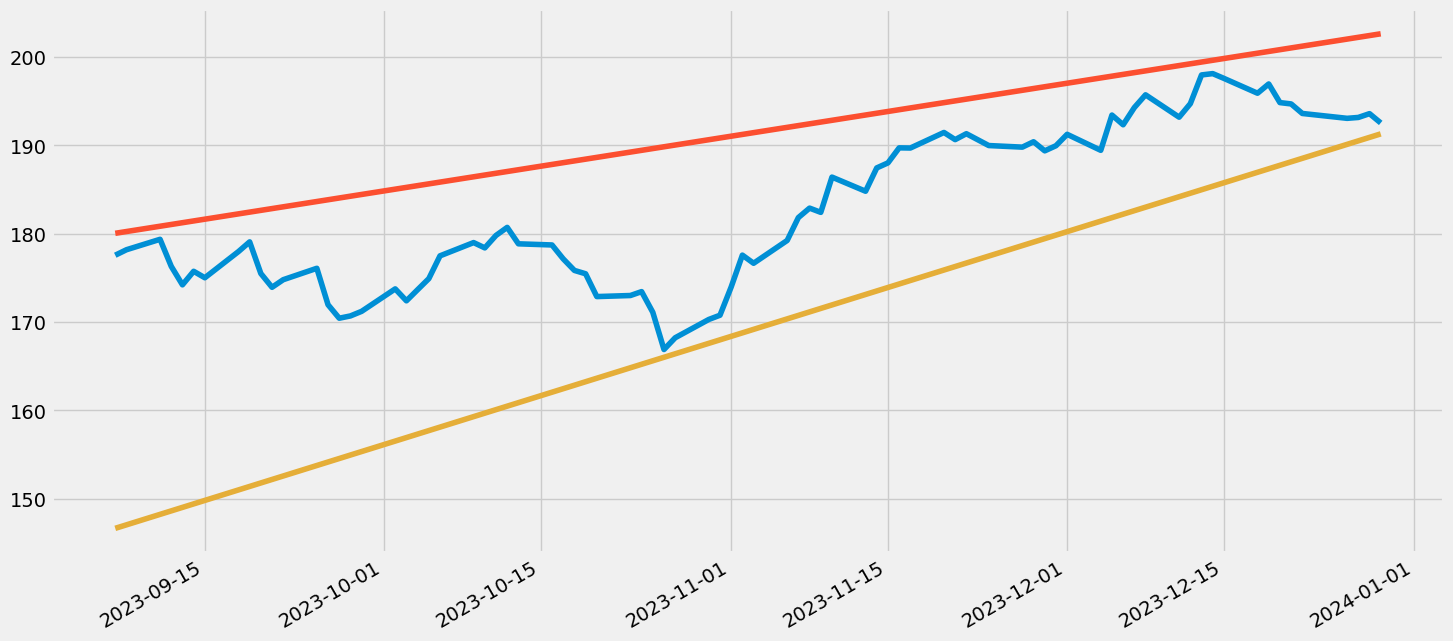

In [14]:
plt.figure(figsize=(16,8))
data0['Close'].plot()
data0['high_trend'].plot()
data0['low_trend'].plot()